<a href="https://colab.research.google.com/github/NishiKlair/NishiKlair/blob/main/neural_network_admit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1+%281%29.csv to Admission_Predict_Ver1.1+%281%29.csv


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [55]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1+%281%29.csv')
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
#Target variable is 'Chance of Admit' -- should be categorical?

df['Admit'] = df['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)


In [57]:
#drop the column 'Chance of Admit '
#also drop column 'Serial No.'

df = df.drop(['Serial No.','Chance of Admit '], axis = 1)
#df.head()

In [8]:
df.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit'],
      dtype='object')

In [9]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit              500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [11]:
df.shape

(500, 8)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
Admit,500.0,0.28400,0.451388,0.0,0.0000,0.00,1.00,1.00


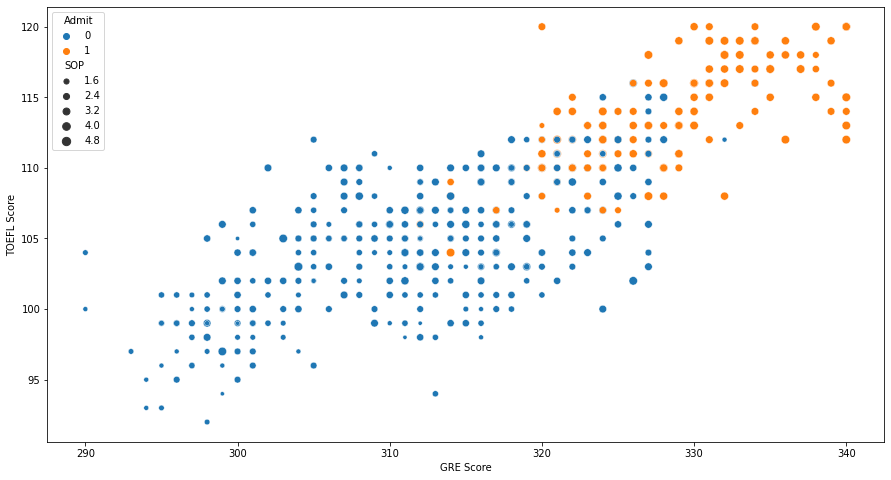

In [13]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, 
                x = 'GRE Score', 
                y = 'TOEFL Score', 
                hue = 'Admit',
                size = 'SOP')
plt.show()


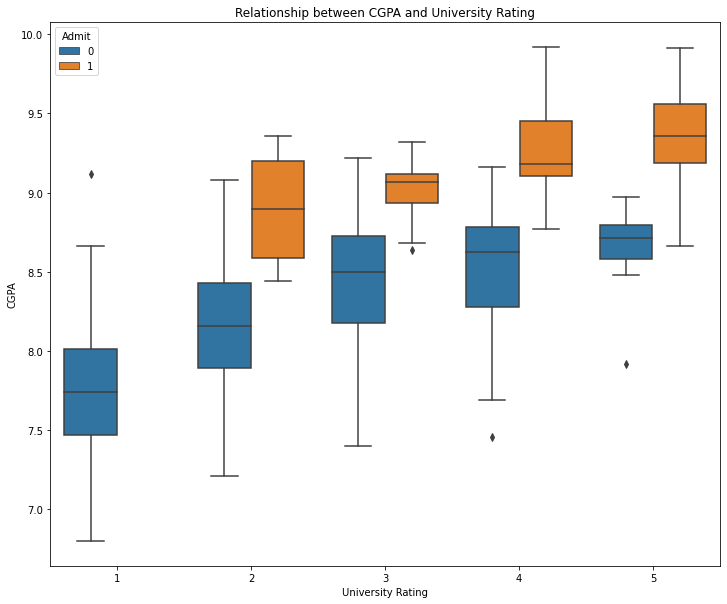

In [48]:
plt.figure(figsize = (12, 10))
sns.boxplot(data=df,
            x = 'University Rating',
            y = 'CGPA',
            hue = 'Admit')
plt.title('Relationship between CGPA and University Rating')
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit              500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [16]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [58]:
## Data Preparation##

#categorical data --> apply one-hot-encoding

# standard scaling for all numerical data <--> ONLY FOR TRAINING DATA 
      # split training and test data
      # apply standard scaling to training data

In [59]:
# apply one hot encoding to 'University Rating'
# drop 'University Rating'

one_hot_data = pd.concat([df, 
                          pd.get_dummies(df['University Rating'], prefix = 'University Rating')],
                          axis = 1 )

one_hot_data = one_hot_data.drop(columns = 'University Rating')
one_hot_data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,337,118,4.5,4.5,9.65,1,1,0,0,0,1,0
1,324,107,4.0,4.5,8.87,1,0,0,0,0,1,0
2,316,104,3.0,3.5,8.00,1,0,0,0,1,0,0
3,322,110,3.5,2.5,8.67,1,0,0,0,1,0,0
4,314,103,2.0,3.0,8.21,0,0,0,1,0,0,0


In [60]:
# split data based on features and target

features = one_hot_data.drop(['Admit'], axis = 1)
target = one_hot_data['Admit']

In [61]:
# Size of data set is small (500)
# use 80:20 ratio for training and test data

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
# random_state = 4 passes seed for random generator, same train and test split for each execution

In [62]:
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [22]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [24]:
# Model Architectures - creating 3 models for performance comparison

In [25]:
# Model 1 --> neural network with 2 hidden layers + 1 output layer

model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_shape =(11,)))
model_1.add(Dropout(0.2))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.1))

model_1.add(Dense(1, activation='sigmoid'))

In [26]:
# loss function --> binary_crossentropy, 
# optimization algorithm --> adamax and
# evaluation metrics --> accuracy

In [27]:
model_1.compile(loss = 'binary_crossentropy', 
                optimizer = 'adamax',
                metrics = ['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [28]:
history_1 = model_1.fit(x_train_normalized,
                        y_train,
                        validation_split = 0.1,
                        epochs = 150,
                        verbose = 2)

Epoch 1/150
12/12 - 1s - loss: 0.6373 - accuracy: 0.7250 - val_loss: 0.6509 - val_accuracy: 0.5750
Epoch 2/150
12/12 - 0s - loss: 0.5813 - accuracy: 0.7361 - val_loss: 0.6019 - val_accuracy: 0.5750
Epoch 3/150
12/12 - 0s - loss: 0.5331 - accuracy: 0.7472 - val_loss: 0.5543 - val_accuracy: 0.7250
Epoch 4/150
12/12 - 0s - loss: 0.4897 - accuracy: 0.8167 - val_loss: 0.4976 - val_accuracy: 0.8500
Epoch 5/150
12/12 - 0s - loss: 0.4477 - accuracy: 0.8528 - val_loss: 0.4505 - val_accuracy: 0.9250
Epoch 6/150
12/12 - 0s - loss: 0.4192 - accuracy: 0.8583 - val_loss: 0.4132 - val_accuracy: 0.9000
Epoch 7/150
12/12 - 0s - loss: 0.3946 - accuracy: 0.8556 - val_loss: 0.3775 - val_accuracy: 0.9000
Epoch 8/150
12/12 - 0s - loss: 0.3690 - accuracy: 0.8556 - val_loss: 0.3548 - val_accuracy: 0.9000
Epoch 9/150
12/12 - 0s - loss: 0.3508 - accuracy: 0.8694 - val_loss: 0.3380 - val_accuracy: 0.9000
Epoch 10/150
12/12 - 0s - loss: 0.3357 - accuracy: 0.8667 - val_loss: 0.3235 - val_accuracy: 0.9000
Epoch 11/

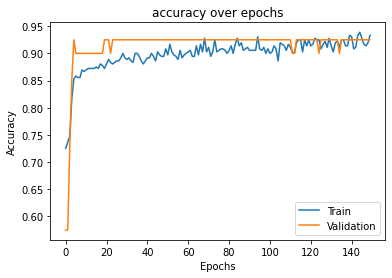

In [29]:
plt.plot(history_1.history['accuracy'], label='Train')
plt.plot(history_1.history['val_accuracy'], label='Validation')

plt.title('accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [30]:
#clear previous model history from this session
from tensorflow.python.keras import backend 
backend.clear_session()

In [31]:
#reset seed

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [32]:
from sklearn import model_selection
model_2 = Sequential()

model_2.add(Dense(128, activation = 'tanh', input_shape = (11,)))
model_2.add(Dropout(0.1))

model_2.add(Dense(64, activation = 'tanh'))
model_2.add(Dropout(0.1))

model_2.add(Dense(32, activation = 'tanh'))

model_2.add(Dense(1, activation = 'sigmoid'))


In [35]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
____________________________________________________

In [37]:
history_2 = model_2.fit(x_train_normalized,
                        y_train,
                        validation_split = 0.1,
                        epochs = 100,
                        verbose = 2)

Epoch 1/100
12/12 - 2s - loss: 0.5653 - accuracy: 0.7417 - val_loss: 0.4820 - val_accuracy: 0.9000
Epoch 2/100
12/12 - 0s - loss: 0.4055 - accuracy: 0.8528 - val_loss: 0.3655 - val_accuracy: 0.9000
Epoch 3/100
12/12 - 0s - loss: 0.3364 - accuracy: 0.8639 - val_loss: 0.3124 - val_accuracy: 0.9000
Epoch 4/100
12/12 - 0s - loss: 0.3235 - accuracy: 0.8639 - val_loss: 0.2959 - val_accuracy: 0.9000
Epoch 5/100
12/12 - 0s - loss: 0.3147 - accuracy: 0.8722 - val_loss: 0.2880 - val_accuracy: 0.9000
Epoch 6/100
12/12 - 0s - loss: 0.3081 - accuracy: 0.8694 - val_loss: 0.2873 - val_accuracy: 0.9000
Epoch 7/100
12/12 - 0s - loss: 0.2891 - accuracy: 0.8722 - val_loss: 0.2945 - val_accuracy: 0.9250
Epoch 8/100
12/12 - 0s - loss: 0.2691 - accuracy: 0.8694 - val_loss: 0.2701 - val_accuracy: 0.9250
Epoch 9/100
12/12 - 0s - loss: 0.2644 - accuracy: 0.8722 - val_loss: 0.2697 - val_accuracy: 0.9250
Epoch 10/100
12/12 - 0s - loss: 0.2520 - accuracy: 0.8861 - val_loss: 0.2619 - val_accuracy: 0.9250
Epoch 11/

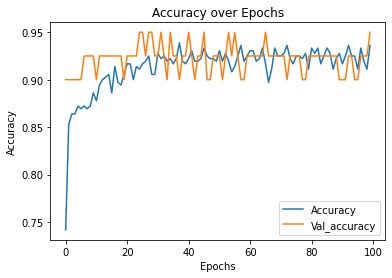

In [38]:
plt.plot(history_2.history['accuracy'], label = 'Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Val_accuracy')

plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
from tensorflow.python.keras import backend
backend.clear_session()

In [42]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
## model 3 - 4 hidden layers and 1 output layer

In [43]:
model_3 = Sequential()
model_3.add(Dense(256, activation = 'tanh', input_shape = (11,)))
model_3.add(Dropout(0.1))

model_3.add(Dense(128, activation = 'tanh'))
model_3.add(Dropout(0.1))

model_3.add(Dense(64, activation = 'tanh'))
model_3.add(Dropout(0.1))

model_3.add(Dense(32, activation = 'tanh'))

model_3.add(Dense(1, activation = 'sigmoid'))



In [67]:
#opt = Adam(learning_rate = 0.001)
model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3072      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [68]:
history_3 = model_3.fit(x_train_normalized,
                        y_train,
                        validation_split = 0.1,
                        epochs = 200,
                        verbose = 2)

Epoch 1/200
12/12 - 2s - loss: 0.5065 - accuracy: 0.7833 - val_loss: 0.3520 - val_accuracy: 0.9000
Epoch 2/200
12/12 - 0s - loss: 0.3666 - accuracy: 0.8583 - val_loss: 0.3290 - val_accuracy: 0.9000
Epoch 3/200
12/12 - 0s - loss: 0.3375 - accuracy: 0.8639 - val_loss: 0.2984 - val_accuracy: 0.9000
Epoch 4/200
12/12 - 0s - loss: 0.3056 - accuracy: 0.8667 - val_loss: 0.2831 - val_accuracy: 0.9250
Epoch 5/200
12/12 - 0s - loss: 0.2924 - accuracy: 0.8667 - val_loss: 0.2501 - val_accuracy: 0.9000
Epoch 6/200
12/12 - 0s - loss: 0.2893 - accuracy: 0.8722 - val_loss: 0.2586 - val_accuracy: 0.9250
Epoch 7/200
12/12 - 0s - loss: 0.2553 - accuracy: 0.8806 - val_loss: 0.2826 - val_accuracy: 0.9250
Epoch 8/200
12/12 - 0s - loss: 0.2301 - accuracy: 0.9000 - val_loss: 0.2501 - val_accuracy: 0.9250
Epoch 9/200
12/12 - 0s - loss: 0.2256 - accuracy: 0.9111 - val_loss: 0.2470 - val_accuracy: 0.9250
Epoch 10/200
12/12 - 0s - loss: 0.2177 - accuracy: 0.9139 - val_loss: 0.2338 - val_accuracy: 0.9250
Epoch 11/

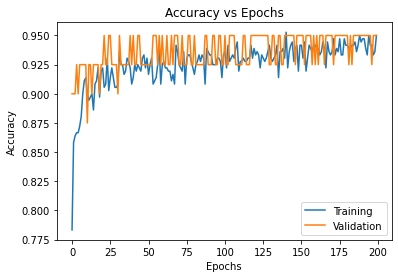

In [70]:
plt.plot(history_3.history['accuracy'], label = 'Training')
plt.plot(history_3.history['val_accuracy'], label = 'Validation')

plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# evaluate the model 3

model_3.evaluate(x_test_normalized, y_test, verbose = 2)
y_pred = np.round(model_3.predict(x_test_normalized))

4/4 - 0s - loss: 0.1051 - accuracy: 0.9500


In [76]:
# generating performance report

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.92      0.89      0.91        27

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100



Text(51.0, 0.5, 'Actual result')

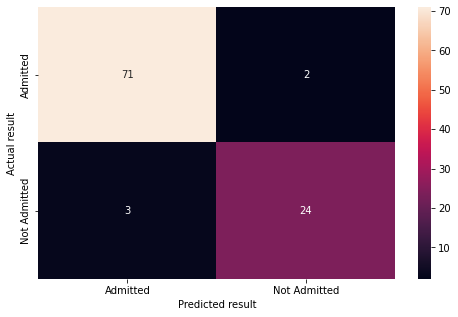

In [78]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot = True, fmt = '.0f',
            xticklabels = ['Admitted', 'Not Admitted'],
            yticklabels = ['Admitted', 'Not Admitted'])
plt.xlabel('Predicted result')
plt.ylabel('Actual result')